In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from wrangle import wrangle_zillow

import warnings
warnings.filterwarnings("ignore")

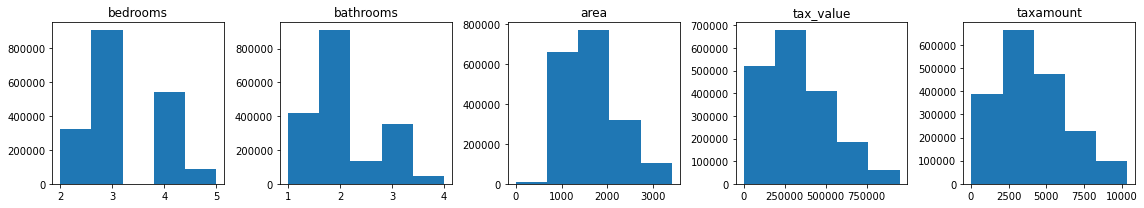

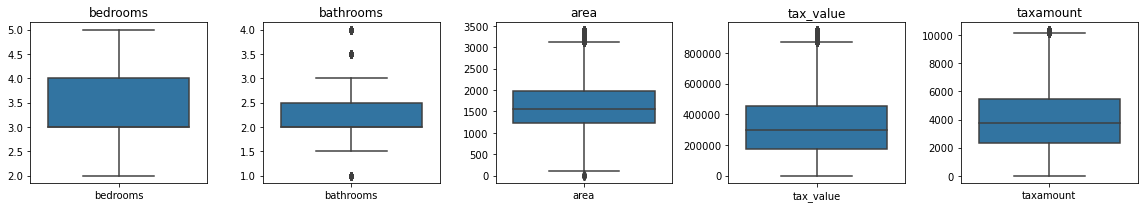

In [2]:
train, validate, test = wrangle_zillow()

In [3]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,6037.0


## Min-Max Scaler
scaled values in range [0-1]  
aka Normalization

In [4]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler.fit(train[['bedrooms', 'bathrooms','area','year_built','fips']])

# 3. use the object (use the min, max to do the transformation)

scaled_values = scaler.transform(train[['bedrooms', 'bathrooms','area','year_built','fips']])
scaled_values[:10]

array([[0.66666667, 0.33333333, 0.4576122 , 0.78921569, 0.2972973 ],
       [0.33333333, 0.33333333, 0.5189205 , 0.7254902 , 0.        ],
       [0.        , 0.        , 0.42563802, 0.65686275, 0.        ],
       [0.33333333, 0.        , 0.29304781, 0.67647059, 0.        ],
       [0.33333333, 0.33333333, 0.5787621 , 0.8627451 , 0.        ],
       [0.        , 0.        , 0.30947492, 0.49019608, 1.        ],
       [0.33333333, 0.33333333, 0.58286888, 0.78921569, 1.        ],
       [0.        , 0.33333333, 0.40510414, 0.62254902, 0.        ],
       [0.33333333, 0.33333333, 0.31064828, 0.72058824, 0.        ],
       [0.33333333, 0.66666667, 0.95189205, 0.84803922, 0.2972973 ]])

In [5]:
# assign the scaled values as new columns in the train
train[['bedrooms_scaled', 'bathrooms_scaled','area_scaled','year_built_scaled','fips_scaled']] = scaled_values

In [6]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips,bedrooms_scaled,bathrooms_scaled,area_scaled,year_built_scaled,fips_scaled
10057,4.0,2.0,1561.0,248240.0,1973.0,6059.0,0.666667,0.333333,0.457612,0.789216,0.297297
2004970,3.0,2.0,1770.0,88390.0,1960.0,6037.0,0.333333,0.333333,0.518921,0.725490,0.000000
306031,2.0,1.0,1452.0,81169.0,1946.0,6037.0,0.000000,0.000000,0.425638,0.656863,0.000000
1038595,3.0,1.0,1000.0,119174.0,1950.0,6037.0,0.333333,0.000000,0.293048,0.676471,0.000000
270959,3.0,2.0,1974.0,432268.0,1988.0,6037.0,0.333333,0.333333,0.578762,0.862745,0.000000


In [7]:
# make new scaled columns for validate and test (transform only)

test[['bedrooms_scaled', 'bathrooms_scaled','area_scaled','year_built_scaled','fips_scaled']] = scaler.transform(test[['bedrooms', 'bathrooms','area','year_built','fips']])
validate[['bedrooms_scaled', 'bathrooms_scaled','area_scaled','year_built_scaled','fips_scaled']] = scaler.transform(validate[['bedrooms', 'bathrooms','area','year_built','fips']])

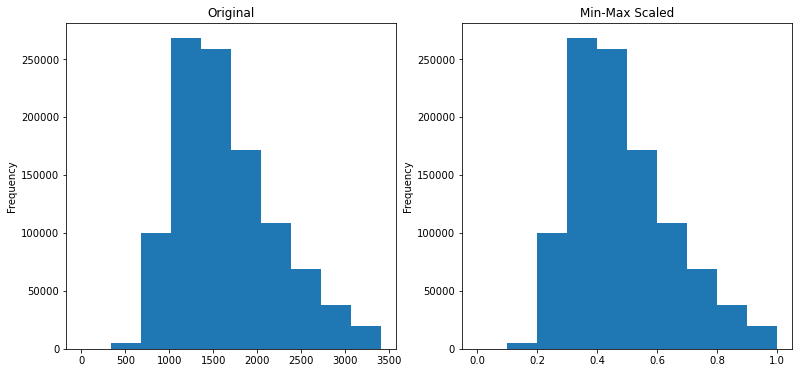

In [8]:
# Visualize the un-scaled and scaled distribution for area

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.area.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.area_scaled.plot.hist(title='Min-Max Scaled');

### Using .inverse_transform

In [9]:
scaled_values = scaler.transform(train[['bedrooms', 'bathrooms','area','year_built','fips']])
scaled_values[:10]

array([[0.66666667, 0.33333333, 0.4576122 , 0.78921569, 0.2972973 ],
       [0.33333333, 0.33333333, 0.5189205 , 0.7254902 , 0.        ],
       [0.        , 0.        , 0.42563802, 0.65686275, 0.        ],
       [0.33333333, 0.        , 0.29304781, 0.67647059, 0.        ],
       [0.33333333, 0.33333333, 0.5787621 , 0.8627451 , 0.        ],
       [0.        , 0.        , 0.30947492, 0.49019608, 1.        ],
       [0.33333333, 0.33333333, 0.58286888, 0.78921569, 1.        ],
       [0.        , 0.33333333, 0.40510414, 0.62254902, 0.        ],
       [0.33333333, 0.33333333, 0.31064828, 0.72058824, 0.        ],
       [0.33333333, 0.66666667, 0.95189205, 0.84803922, 0.2972973 ]])

In [10]:
inverse_scaled_values = scaler.inverse_transform(train[['bedrooms', 'bathrooms','area','year_built','fips']])
inverse_scaled_values[:10]

array([[1.4000000e+01, 7.0000000e+00, 5.3214500e+06, 4.0430400e+05,
        4.5440300e+05],
       [1.1000000e+01, 7.0000000e+00, 6.0339310e+06, 4.0165200e+05,
        4.5277500e+05],
       [8.0000000e+00, 4.0000000e+00, 4.9498690e+06, 3.9879600e+05,
        4.5277500e+05],
       [1.1000000e+01, 4.0000000e+00, 3.4090010e+06, 3.9961200e+05,
        4.5277500e+05],
       [1.1000000e+01, 7.0000000e+00, 6.7293670e+06, 4.0736400e+05,
        4.5277500e+05],
       [8.0000000e+00, 4.0000000e+00, 3.5999050e+06, 3.9186000e+05,
        4.5825100e+05],
       [1.1000000e+01, 7.0000000e+00, 6.7770930e+06, 4.0430400e+05,
        4.5825100e+05],
       [8.0000000e+00, 7.0000000e+00, 4.7112390e+06, 3.9736800e+05,
        4.5277500e+05],
       [1.1000000e+01, 7.0000000e+00, 3.6135410e+06, 4.0144800e+05,
        4.5277500e+05],
       [1.1000000e+01, 1.0000000e+01, 1.1065615e+07, 4.0675200e+05,
        4.5440300e+05]])

In [11]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips,bedrooms_scaled,bathrooms_scaled,area_scaled,year_built_scaled,fips_scaled
10057,4.0,2.0,1561.0,248240.0,1973.0,6059.0,0.666667,0.333333,0.457612,0.789216,0.297297
2004970,3.0,2.0,1770.0,88390.0,1960.0,6037.0,0.333333,0.333333,0.518921,0.725490,0.000000
306031,2.0,1.0,1452.0,81169.0,1946.0,6037.0,0.000000,0.000000,0.425638,0.656863,0.000000
1038595,3.0,1.0,1000.0,119174.0,1950.0,6037.0,0.333333,0.000000,0.293048,0.676471,0.000000
270959,3.0,2.0,1974.0,432268.0,1988.0,6037.0,0.333333,0.333333,0.578762,0.862745,0.000000


It does not appear to put the data exactly as the original data

## Standard Scaler
Removes the mean and scales the data to unit variance

$$ x' = \frac{x - \bar{x}}{\sigma_x} $$

  $\mu = 0$ and $\sigma = 1$

In [19]:
# 1. create the object
scaler = sklearn.preprocessing.StandardScaler()

# 2. fit the object
scaler.fit(train[['area']])

# 3. use the object. Scale total_bill only
train['area_scaled'] = scaler.transform(train[['area']])
test['area_scaled'] = scaler.transform(test[['area']])
validate['area_scaled'] = scaler.transform(validate[['area']])

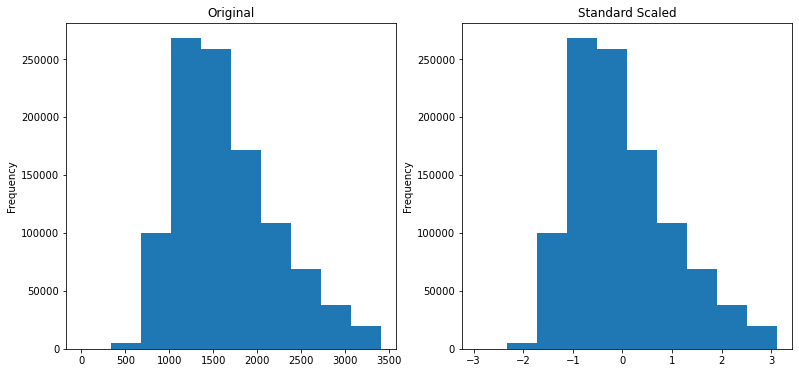

In [20]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))

plt.subplot(121)
train.area.plot.hist(title='Original')

plt.subplot(122)
train.area_scaled.plot.hist(title='Standard Scaled');

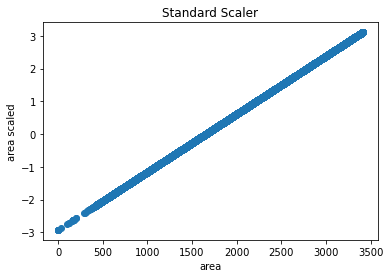

In [22]:
plt.scatter(train.area, train.area_scaled)
plt.xlabel('area')
plt.ylabel('area scaled')
plt.title('Standard Scaler');